In [1]:
import pandas as pd
import numpy as np

In [2]:
##Pre-Processing

In [3]:
df2 = pd.read_csv('data_mrna_seq_fpkm_zscores_ref_all_samples.txt', sep = "\t")

validSamples = df2.columns
validSamples = validSamples[1:]
validSamples

Index(['SP89389', 'SP21193', 'SP13206', 'SP103623', 'SP32742', 'SP111095',
       'SP8394', 'SP87446', 'SP36586', 'SP123902',
       ...
       'SP15656', 'SP123888', 'SP59420', 'SP116679', 'SP1377', 'SP16269',
       'SP122676', 'SP88776', 'SP64546', 'SP21057'],
      dtype='object', length=1210)

In [4]:
df = pd.read_csv('data_clinical_sample.txt', sep='\t')
df

# drop first few rows of meta data
df = df.iloc[4:]
df.reset_index(drop=True, inplace=True)
df

# only include data with valid samples
df = df[df['#Sample Identifier'].isin(validSamples)]
df

# drop all data with NA in Tumor Stage column
df = df.dropna(subset=['Tumor Stage (AJCC)'])
df

cancerCounts = df['Cancer Type'].value_counts()
cancerCounts

Cancer Type
Mature B-cell lymphoma                          95
Pancreatic Cancer                               71
Mature B-Cell Neoplasms                         71
Hepatobiliary Cancer                            67
Ovarian Cancer                                  60
Renal Cell Carcinoma                            33
Esophagogastric Cancer                           7
Intraductal Papillary Mucinous Neoplasm          3
Posttransplant Lymphoproliferative Disorders     1
Name: count, dtype: int64

In [5]:
allStages = df['Tumor Stage (AJCC)'].unique()
print(allStages)
# The goal is to only have the following stages: 1, 2, 3, and 4

# first convert anything with T1 to 1, anything with T2 to 2, etc.
def convertStage(stage):
    if 'T1' in stage:
        return '1'
    elif 'T2' in stage:
        return '2'
    elif 'T3' in stage:
        return '3'
    elif 'T4' in stage:
        return '4'
    else:
        return stage

df['Tumor Stage (AJCC)'] = df['Tumor Stage (AJCC)'].apply(convertStage)
print(df['Tumor Stage (AJCC)'].unique())

# There are some values what cannot be used/converted, so we will drop them
drop_values = ['M0', 'unknown', 'M1', 'M2', 'M3', 'TXNXM1', 'TxNxMx', 'A', 'B', 'C']
df = df[~df['Tumor Stage (AJCC)'].isin(drop_values)]
print(df['Tumor Stage (AJCC)'].unique())

# now convert anything with 1 to 1, anything with 2 to 2, etc.
def convertStage2(stage):
    if '1' in stage:
        return '1'
    elif '2' in stage:
        return '2'
    elif '3' in stage:
        return '3'
    elif '4' in stage:
        return '4'
    else:
        return stage
    
df['Tumor Stage (AJCC)'] = df['Tumor Stage (AJCC)'].apply(convertStage2)
print(df['Tumor Stage (AJCC)'].unique())

# finally convert anything with I to 1, anything with II to 2, etc.
# must use if statements in reverse order since I is in III which would convert III to one
# we do not wnat this
def convertStage3(stage):
    if 'IV' in stage:
        return '4'
    elif 'III' in stage:
        return '3'
    elif 'II' in stage:
        return '2'
    elif 'I' in stage:
        return '1'
    else:
        return stage
    
df['Tumor Stage (AJCC)'] = df['Tumor Stage (AJCC)'].apply(convertStage3)
print(df['Tumor Stage (AJCC)'].unique())

cancerCounts = df['Cancer Type'].value_counts()
cancerCounts

['III' 'IV' 'T3bNXMX' 'T1aNXMX' 'T1bN0MX' 'T3aNXMX' 'T3aN0MX' 'T3aN0M0'
 'T2aNXMX' 'T1bNXMX' 'T1aN0M0' 'T1bN0M1' 'T1bN0M0' 'T3N1bMX' 'T3N1M0'
 'T2N0MX' 'T1N0MX' 'T3N0MX' 'T3N1MX' 'T4N1M1' 'T2N1M1' '3b' '3c' '1a' '2a'
 'B' 'unknown' 'C' 'A' '2' 'T3NXMX' 'T2N1bMX' 'T3N1aMX' 'T2N1MX' 'T1N1bMX'
 'T3N1M1' 'T4N1bM1' '4' '3' '1']
['III' 'IV' '3' '1' '2' '4' '3b' '3c' '1a' '2a' 'B' 'unknown' 'C' 'A']
['III' 'IV' '3' '1' '2' '4' '3b' '3c' '1a' '2a']
['III' 'IV' '3' '1' '2' '4']
['3' '4' '1' '2']


Cancer Type
Pancreatic Cancer                          71
Hepatobiliary Cancer                       67
Ovarian Cancer                             60
Renal Cell Carcinoma                       33
Esophagogastric Cancer                      7
Intraductal Papillary Mucinous Neoplasm     3
Name: count, dtype: int64

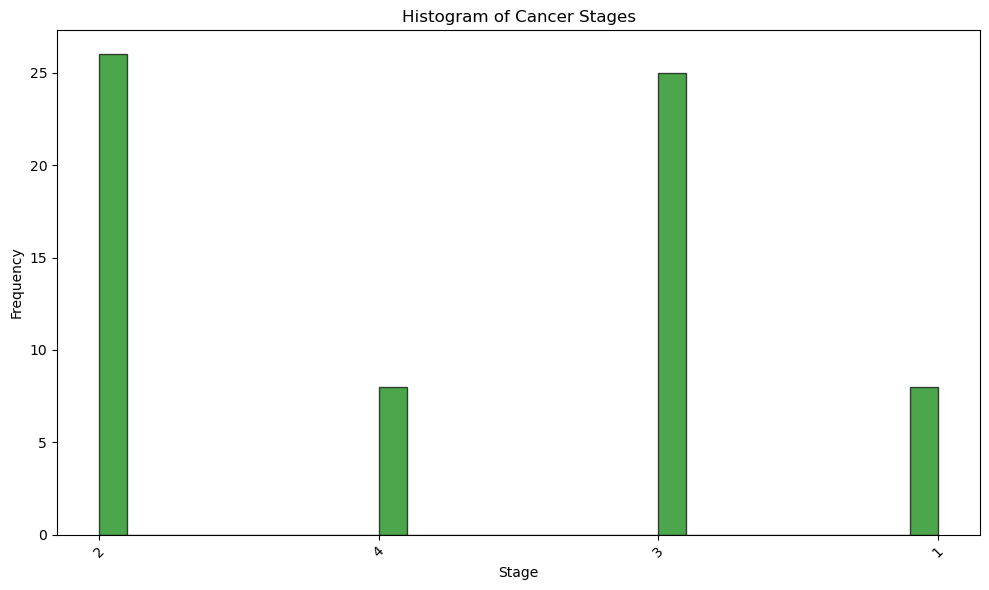

In [6]:
import matplotlib.pyplot as plt

myList = ['Hepatobiliary Cancer']
new_df = df[df['Cancer Type'] == 'Hepatobiliary Cancer']
#new_df = df[df['Cancer Type'].isin(myList)]
plt.figure(figsize=(10, 6))
plt.hist(new_df['Tumor Stage (AJCC)'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Histogram of Cancer Stages')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
new_df = new_df[['#Sample Identifier', 'Cancer Type Detailed', 'Tumor Stage (AJCC)', 'Cancer Type']]
new_df

# find the samples that we need
samples = new_df['#Sample Identifier'].to_list()

In [8]:
# filter df2 for the samples we need
samples.append('Hugo_Symbol')
df2filtered = df2[samples]

In [9]:
# remove all rows with only NaN values
has_nan = df2filtered.isna().any().any()
print(has_nan)

numeric_columns = df2filtered.iloc[:, :-1]
rows_with_all_NaN = numeric_columns.apply(pd.isna).all(axis=1)
df2filtered = df2filtered[~rows_with_all_NaN]

True


In [10]:
has_nan = df2filtered.isna().any().any()
print(has_nan)
df2filtered

False


,SP50115,SP98896,SP98898,SP98900,SP98902,SP98913,SP98915,SP98921,SP98925,SP98941,...,SP99297,SP99301,SP99305,SP99321,SP99325,SP99329,SP99333,SP99337,SP99341,Hugo_Symbol
0,1.2171,1.6326,0.6409,1.6571,1.8209,1.6177,1.6264,0.7508,1.0063,1.6425,...,0.0988,-0.5004,0.9646,-0.4430,-2.3793,-0.7152,0.2486,-1.0938,-0.5653,TSPAN6
1,-0.4745,-0.1549,-0.4251,-0.4745,-0.2861,-0.4745,-0.3739,-0.3575,-0.3691,-0.4745,...,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,TNMD
2,-0.0690,2.0124,0.5299,-0.1919,-0.0832,0.1556,0.9236,-0.3861,-0.1629,1.0351,...,0.5363,-0.0245,-0.4866,0.0253,0.2407,-0.4463,0.2004,0.0743,0.0570,DPM1
3,-0.2357,0.8319,1.1502,-1.2624,0.8662,1.3653,0.7424,-0.1326,0.5926,-0.2929,...,-0.3228,0.8976,-0.7040,0.8698,-1.1660,1.6396,-0.8002,-0.2606,-0.1377,SCYL3
4,-1.1706,0.0801,-0.0798,-1.1219,-0.3264,-0.4997,-0.6673,-1.1954,-0.7466,-0.5651,...,0.2400,0.7231,-0.4439,0.0375,0.0337,1.0230,-0.7125,-0.2065,0.2993,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55908,-0.6448,0.0192,0.3606,-0.9670,2.2310,-0.6881,0.9478,-0.4278,-0.0308,-0.7696,...,-0.9670,1.5902,1.0031,0.8701,0.5013,0.9080,-0.5423,-0.8644,-0.6812,RP4-621B10.8
55909,-0.4405,1.0493,0.6480,-0.5955,1.0495,0.0372,0.3077,1.6293,0.4301,1.1087,...,-0.7408,0.5281,-0.9395,0.7884,0.4678,-0.2811,-0.2391,0.5932,-0.1420,RP11-114I8.4
55910,2.1289,0.1336,1.9165,-0.8886,0.4843,1.1117,0.8883,7.8366,2.2502,1.8573,...,-0.8886,-0.4692,-0.5574,2.0557,-0.1308,0.0322,-0.5279,-0.6967,0.0396,RP11-180C16.1
55911,-0.3875,-0.7571,-0.0269,-0.3662,-0.7055,-0.7571,-0.4457,-0.5123,-0.6448,-0.3142,...,0.2772,-0.6809,-0.0036,-0.5995,0.2822,-0.1820,-0.3102,-0.4249,-0.6596,AP000230.1


In [11]:
# Hugo_Symbol tells us which gene
df2filtered = df2filtered.set_index('Hugo_Symbol')
df2filtered

,SP50115,SP98896,SP98898,SP98900,SP98902,SP98913,SP98915,SP98921,SP98925,SP98941,...,SP99293,SP99297,SP99301,SP99305,SP99321,SP99325,SP99329,SP99333,SP99337,SP99341
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,1.2171,1.6326,0.6409,1.6571,1.8209,1.6177,1.6264,0.7508,1.0063,1.6425,...,0.3890,0.0988,-0.5004,0.9646,-0.4430,-2.3793,-0.7152,0.2486,-1.0938,-0.5653
TNMD,-0.4745,-0.1549,-0.4251,-0.4745,-0.2861,-0.4745,-0.3739,-0.3575,-0.3691,-0.4745,...,-0.3601,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745,-0.4745
DPM1,-0.0690,2.0124,0.5299,-0.1919,-0.0832,0.1556,0.9236,-0.3861,-0.1629,1.0351,...,-0.0029,0.5363,-0.0245,-0.4866,0.0253,0.2407,-0.4463,0.2004,0.0743,0.0570
SCYL3,-0.2357,0.8319,1.1502,-1.2624,0.8662,1.3653,0.7424,-0.1326,0.5926,-0.2929,...,0.2472,-0.3228,0.8976,-0.7040,0.8698,-1.1660,1.6396,-0.8002,-0.2606,-0.1377
C1orf112,-1.1706,0.0801,-0.0798,-1.1219,-0.3264,-0.4997,-0.6673,-1.1954,-0.7466,-0.5651,...,-0.4552,0.2400,0.7231,-0.4439,0.0375,0.0337,1.0230,-0.7125,-0.2065,0.2993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP4-621B10.8,-0.6448,0.0192,0.3606,-0.9670,2.2310,-0.6881,0.9478,-0.4278,-0.0308,-0.7696,...,-0.9670,-0.9670,1.5902,1.0031,0.8701,0.5013,0.9080,-0.5423,-0.8644,-0.6812
RP11-114I8.4,-0.4405,1.0493,0.6480,-0.5955,1.0495,0.0372,0.3077,1.6293,0.4301,1.1087,...,0.2950,-0.7408,0.5281,-0.9395,0.7884,0.4678,-0.2811,-0.2391,0.5932,-0.1420
RP11-180C16.1,2.1289,0.1336,1.9165,-0.8886,0.4843,1.1117,0.8883,7.8366,2.2502,1.8573,...,0.5051,-0.8886,-0.4692,-0.5574,2.0557,-0.1308,0.0322,-0.5279,-0.6967,0.0396


In [12]:
df2filtered = df2filtered[(df2filtered.mean(axis=1) <= -2) | (df2filtered.mean(axis=1) >= 2)]
df2filtered

,SP50115,SP98896,SP98898,SP98900,SP98902,SP98913,SP98915,SP98921,SP98925,SP98941,...,SP99293,SP99297,SP99301,SP99305,SP99321,SP99325,SP99329,SP99333,SP99337,SP99341
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CFH,2.6753,2.7240,2.7706,1.5423,3.2073,2.0238,2.7819,2.3241,2.6531,2.4941,...,1.5602,1.0775,0.5561,1.1367,0.7463,-0.6079,0.5988,0.7484,1.2533,0.7501
PON1,3.5607,3.1734,3.1378,3.1375,3.5100,3.6966,3.4178,3.7131,2.1908,3.8950,...,0.2076,0.2440,0.6212,0.3488,-0.1874,-0.3163,0.7756,-0.2693,1.2777,-0.2594
FMO3,3.0867,3.1974,3.1443,2.1911,2.7133,3.8179,3.7341,2.9213,2.4237,3.5884,...,0.6631,0.2298,0.9244,0.2143,-0.0377,-0.4940,0.5448,0.1010,0.3738,0.1571
MLXIPL,3.1693,2.6348,2.3509,1.6951,2.9118,3.2725,3.0150,3.7879,2.1682,2.9353,...,1.9274,-0.0986,-0.1363,0.5504,0.2666,0.8759,0.7921,1.3318,1.4524,-0.4303
CYP3A43,7.9382,2.6334,0.3536,1.1678,7.0723,1.2731,3.4135,4.8549,0.1132,4.0913,...,-0.2728,0.0586,-0.0870,-0.2400,-0.2977,-0.2853,-0.0293,-0.3062,-0.2145,-0.2873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP13-270P17.3,-3.5301,-3.5301,-3.5301,-3.5301,-3.5301,-3.5301,-3.5301,-3.5301,-3.5301,-3.5301,...,-3.5301,0.2664,-0.2844,-2.0994,1.9156,1.9956,1.1261,-2.2288,-1.2320,-0.5032
OR52E1,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,...,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333,-2.0333
GS1-293C5.1,4.0068,3.5105,2.1697,-0.4960,0.7564,-0.8514,1.2165,2.6444,2.4253,4.7253,...,2.1902,3.5599,-0.4587,0.2449,1.0460,-0.8514,-0.5547,-0.8514,2.4571,-0.1351


In [13]:
df_expression = df2filtered.T
new_df.set_index('#Sample Identifier', inplace=True)
df_merged = df_expression.join(new_df)
df_merged

,CFH,PON1,FMO3,MLXIPL,CYP3A43,CPS1,ABCC2,HSD17B6,C6,ITIH4,...,RP11-38L15.8,RP11-66B24.8,RP13-270P17.3,OR52E1,GS1-293C5.1,RP11-290D2.6,RP5-1180E21.5,Cancer Type Detailed,Tumor Stage (AJCC),Cancer Type
SP50115,2.6753,3.5607,3.0867,3.1693,7.9382,3.1181,3.4213,3.5070,3.2349,5.1374,...,3.9659,-2.0854,-3.5301,-2.0333,4.0068,-3.3423,-2.7169,Hepatocellular Carcinoma,2,Hepatobiliary Cancer
SP98896,2.7240,3.1734,3.1974,2.6348,2.6334,4.3796,3.0209,3.2826,3.4900,3.4790,...,2.7651,-2.0854,-3.5301,-2.0333,3.5105,-3.3423,-2.7169,Hepatocellular Carcinoma,2,Hepatobiliary Cancer
SP98898,2.7706,3.1378,3.1443,2.3509,0.3536,1.9229,3.1974,2.8231,3.0155,3.4083,...,2.8228,-2.0854,-3.5301,-2.0333,2.1697,-3.3423,-2.7169,Hepatocellular Carcinoma,4,Hepatobiliary Cancer
SP98900,1.5423,3.1375,2.1911,1.6951,1.1678,-0.0124,2.8678,2.6489,1.1106,2.6841,...,2.3255,-2.0854,-3.5301,-2.0333,-0.4960,-3.3423,-2.7169,Hepatocellular Carcinoma,2,Hepatobiliary Cancer
SP98902,3.2073,3.5100,2.7133,2.9118,7.0723,3.3184,2.9322,3.3362,3.6423,4.2647,...,4.0988,-2.0854,-3.5301,-2.0333,0.7564,-3.3423,-2.7169,Hepatocellular Carcinoma,3,Hepatobiliary Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP99325,-0.6079,-0.3163,-0.4940,0.8759,-0.2853,-0.4217,-0.5382,-0.6211,-0.4845,-0.3899,...,-0.6766,-2.0854,1.9956,-2.0333,-0.8514,0.3610,1.2393,Cholangiocarcinoma,1,Hepatobiliary Cancer
SP99329,0.5988,0.7756,0.5448,0.7921,-0.0293,0.5279,0.6002,0.2743,0.7228,0.9797,...,-0.6109,-2.0854,1.1261,-2.0333,-0.5547,-0.1975,0.5861,Cholangiocarcinoma,2,Hepatobiliary Cancer
SP99333,0.7484,-0.2693,0.1010,1.3318,-0.3062,0.0289,0.5376,-0.5800,-0.3904,-0.3522,...,-0.7118,-2.0854,-2.2288,-2.0333,-0.8514,1.0601,-0.0883,Cholangiocarcinoma,3,Hepatobiliary Cancer
SP99337,1.2533,1.2777,0.3738,1.4524,-0.2145,0.3479,0.0466,-0.1688,0.4333,0.0939,...,-0.5443,-2.0854,-1.2320,-2.0333,2.4571,1.0982,0.3698,Cholangiocarcinoma,4,Hepatobiliary Cancer


In [14]:
df_merged['Cancer Type Detailed'] = df_merged['Cancer Type Detailed'].str.lower()
print(df_merged['Cancer Type Detailed'].unique())

['hepatocellular carcinoma' 'cholangiocarcinoma']


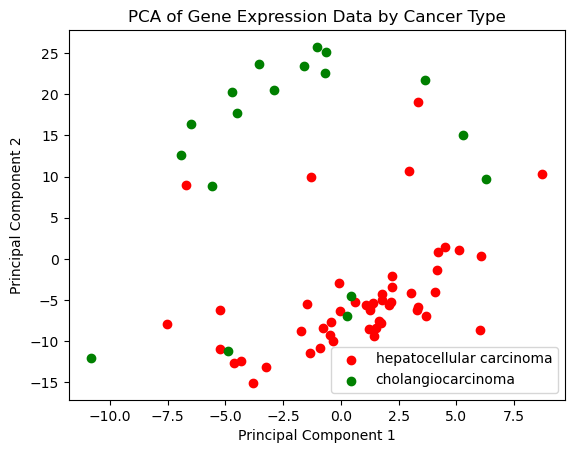

In [15]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df_merged.drop(['Tumor Stage (AJCC)','Cancer Type Detailed','Cancer Type'], axis=1)  # gene expression data
y = df_merged['Cancer Type Detailed']  # cancer stages

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementation by hand
S = np.cov(X_scaled.T)

_, eigenvectors = np.linalg.eigh(S)

X_pca2 = np.dot(X_scaled, eigenvectors[:, -2:])

# For X_pca2
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca2, columns=['PC1', 'PC2'])
pca_df['Cancer Type Detailed'] = y.values  # add stage information

# Plotting
fig, ax = plt.subplots()
stages = pca_df['Cancer Type Detailed'].unique()
colors = ['r', 'g', 'b', 'k']  # Colors for the stages
for stage, color in zip(stages, colors):
    stage_mask = pca_df['Cancer Type Detailed'] == stage
    ax.scatter(pca_df.loc[stage_mask, 'PC1'], pca_df.loc[stage_mask, 'PC2'], label=stage, color=color)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Gene Expression Data by Cancer Type')
ax.legend()
plt.show()

In [16]:
# Create a new column combining 'Cancer Type Detailed' and 'Tumor Stage (AJCC)'
df_merged['Type_Stage'] = df_merged['Cancer Type Detailed'] + ' - ' + df_merged['Tumor Stage (AJCC)']

# Check the new combined column
print(df_merged['Type_Stage'].unique())

['hepatocellular carcinoma - 2' 'hepatocellular carcinoma - 4'
 'hepatocellular carcinoma - 3' 'hepatocellular carcinoma - 1'
 'cholangiocarcinoma - 1' 'cholangiocarcinoma - 2'
 'cholangiocarcinoma - 3' 'cholangiocarcinoma - 4']


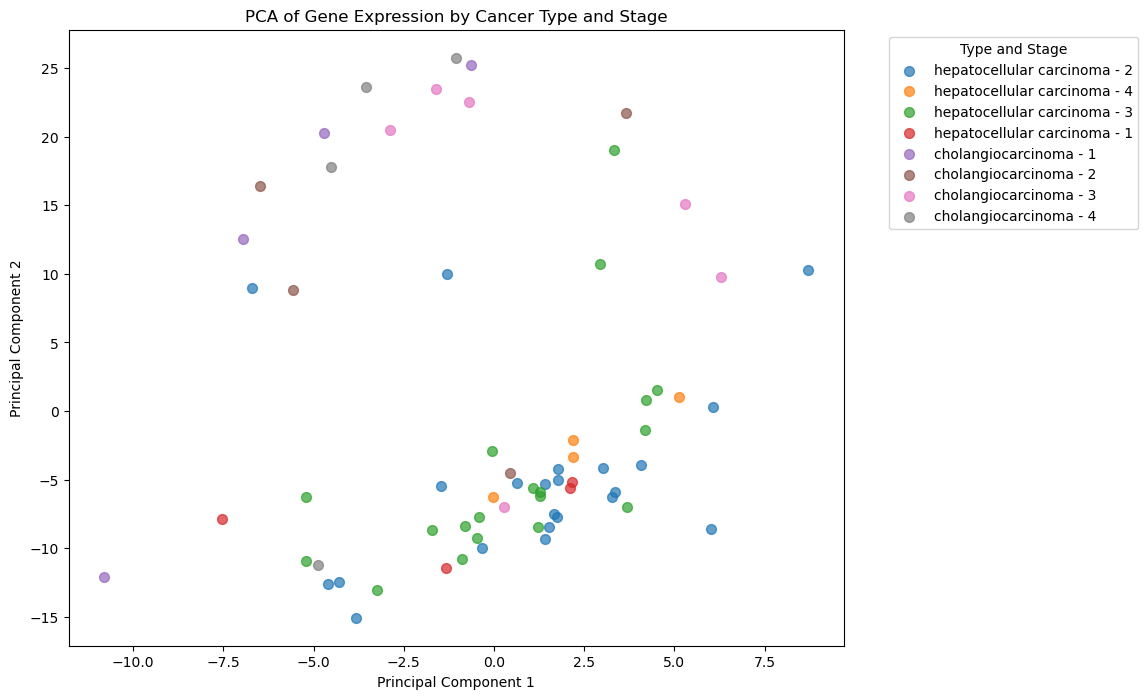

In [17]:
# Standardizing the data
X = df_merged.drop(['Cancer Type Detailed', 'Tumor Stage (AJCC)','Cancer Type', 'Type_Stage'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA implementation by hand
S = np.cov(X_scaled.T)

_, eigenvectors = np.linalg.eigh(S)

X_pca2 = np.dot(X_scaled, eigenvectors[:, -2:])

# For X_pca2
# Convert PCA results into a DataFrame for easier plotting
pca_df = pd.DataFrame(data = X_pca2, columns = ['PC1', 'PC2'], index=X.index)
pca_df['Type_Stage'] = df_merged['Type_Stage']  # Add the new combined feature

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in zip(pca_df['Type_Stage'].unique(), plt.cm.tab20.colors):
    condition = pca_df['Type_Stage'] == label
    ax.scatter(pca_df.loc[condition, 'PC1'], pca_df.loc[condition, 'PC2'], label=label, s=50, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Gene Expression by Cancer Type and Stage')
ax.legend(title='Type and Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
# Load the dataset
df = pd.read_csv('merged_data.csv')

In [19]:
df_numeric = df.iloc[:, 1:-3]

from sklearn.preprocessing import StandardScaler

X = df_numeric.drop('Cancer Type Detailed', axis=1)
y = df_numeric['Cancer Type Detailed']

In [20]:
# KNN

predictions = []

# adjust k as needed
k = 2

for point in X_pca2:
    distances = np.sqrt(np.sum((X_pca2 - point) ** 2, axis=1))
    
    nearestNeighborsIndices = np.argsort(distances)[:k]
    
    nearestNeighborsLabels = y[nearestNeighborsIndices]

    predictions.append(nearestNeighborsLabels.mode()[0])

accuracy = np.mean(predictions == y)
accuracy

0.8955223880597015

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to reduce to 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca2, y, test_size=0.2, random_state=42)


k = 2  # Adjust k as needed
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# F1-score and Precision
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")

# Classification report
print(classification_report(y_test, y_pred))

# Cross-Validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_scores = cross_val_score(knn, X_pca2, y, cv=cv, scoring='f1_weighted')
print("Cross-validated F1 Scores:", cross_val_scores)
print("Average F1 Score from CV:", np.mean(cross_val_scores))

F1 Score: 0.9319727891156463
Precision: 0.9464285714285714
                          precision    recall  f1-score   support

      cholangiocarcinoma       0.75      1.00      0.86         3
hepatocellular carcinoma       1.00      0.91      0.95        11

                accuracy                           0.93        14
               macro avg       0.88      0.95      0.90        14
            weighted avg       0.95      0.93      0.93        14

Cross-validated F1 Scores: [0.79197995 0.72698413 0.77964141 0.71538462 0.71648352]
Average F1 Score from CV: 0.7460947239894609


In [22]:
# Load the dataset
df = pd.read_csv('merged_data.csv')

# Filter the DataFrame to only include specific cancer types
cancer_types = ['hepatocellular carcinoma - 1', 'hepatocellular carcinoma - 2', 'hepatocellular carcinoma - 3']
df_filtered = df[df['Type_Stage'].isin(cancer_types)]

# Select only numeric columns for PCA
df_numeric = df_filtered.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Perform PCA to reduce dimensions to 2
S = np.cov(X_scaled.T)
_, eigenvectors = np.linalg.eigh(S)
X_pca2 = np.dot(X_scaled, eigenvectors[:, -2:])

# Prepare labels and data for classification
y = df_filtered['Type_Stage']

# Nearest neighbors classification
predictions = []
k = 3  # adjust k as needed

for point in X_pca2:
    distances = np.sqrt(np.sum((X_pca2 - point) ** 2, axis=1))
    nearestNeighborsIndices = np.argsort(distances)[:k]
    nearestNeighborsLabels = y.iloc[nearestNeighborsIndices]
    predictions.append(nearestNeighborsLabels.mode()[0])

# Calculate accuracy
accuracy = np.mean(predictions == y.to_numpy())
print('Accuracy:', accuracy)

Accuracy: 0.7333333333333333


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_numeric = df.iloc[:, 1:-3]

y = df_numeric['Cancer Type Detailed']
X = df_numeric.drop(columns=['Cancer Type Detailed'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

column_names = X.columns.tolist()

1.0
[0.63636364 0.81818182 1.         0.7        1.        ]
0.8309090909090908


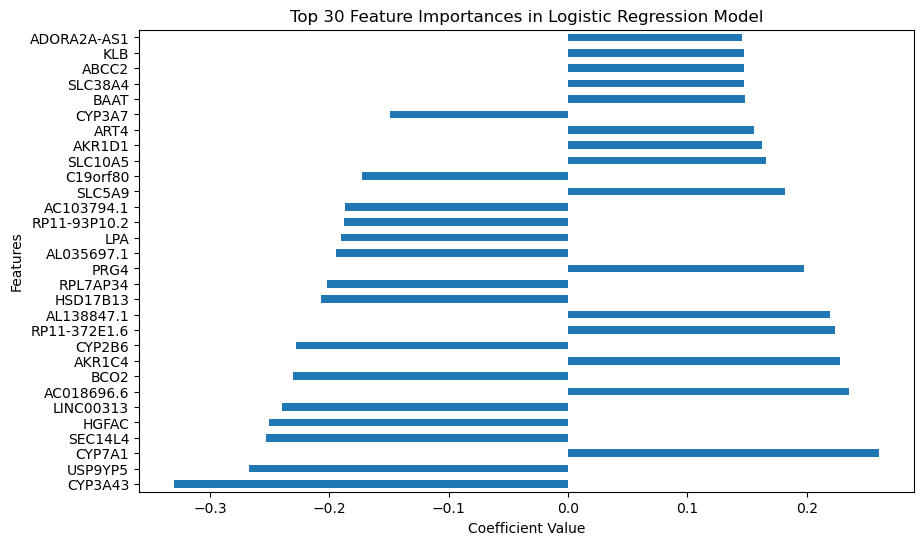

In [24]:
import matplotlib.pyplot as plt
coefficients = log_reg.coef_[0]  

feature_importance = pd.DataFrame(coefficients, index=column_names, columns=['Coefficient'])

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

sorted_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

top_30_features = sorted_features.head(30)

plt.figure(figsize=(10, 6))
top_30_features['Coefficient'].plot(kind='barh')
plt.title('Top 30 Feature Importances in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Detailed classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 1.00
Confusion Matrix:
 [[ 3  0]
 [ 0 11]]
Classification Report:
                           precision    recall  f1-score   support

      cholangiocarcinoma       1.00      1.00      1.00         3
hepatocellular carcinoma       1.00      1.00      1.00        11

                accuracy                           1.00        14
               macro avg       1.00      1.00      1.00        14
            weighted avg       1.00      1.00      1.00        14



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up the grid of parameters to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40 , 50],
    'min_samples_split': [2, 5, 10, 15 ,20],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_es

[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_featu

[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sq

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=lo

[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_featur

[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_featur

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_dep

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_dep

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_fe

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features

[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_featur

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_fea

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=l

[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, m

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features

[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto

[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_featur

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=40, max_featu

[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_featur

[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=au

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_featu

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_featu

/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1531 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
 

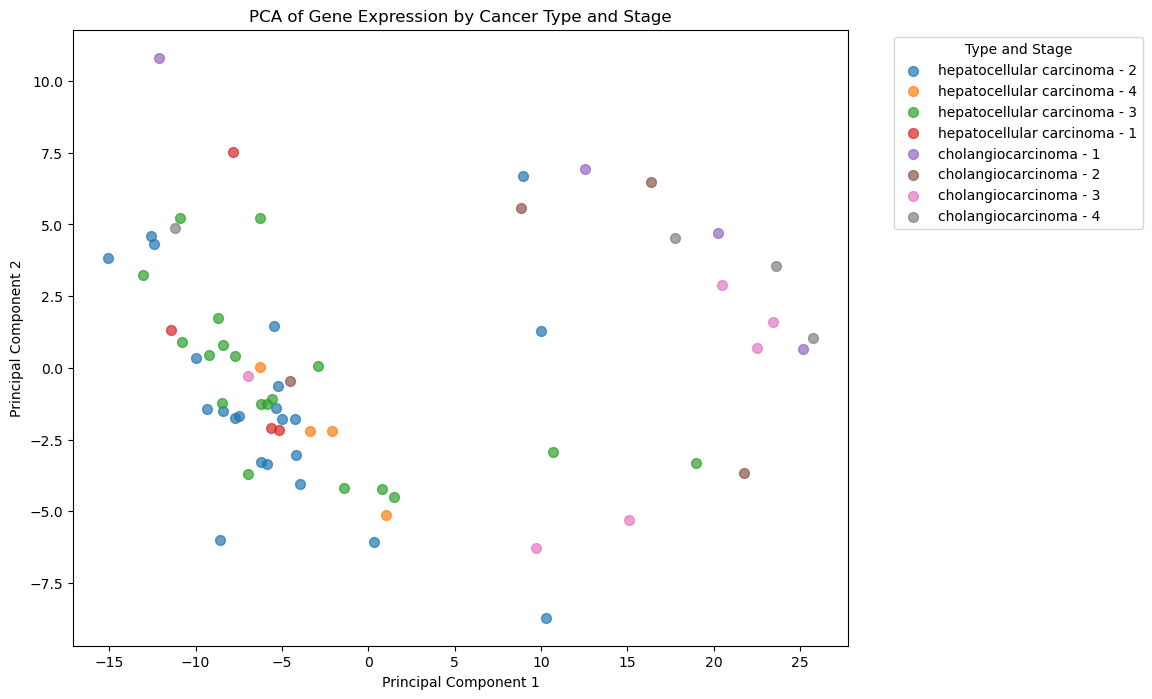

In [27]:
X = df_merged.drop(['Cancer Type Detailed', 'Tumor Stage (AJCC)','Cancer Type', 'Type_Stage'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results into a DataFrame for easier plotting
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'], index=X.index)
pca_df['Type_Stage'] = df_merged['Type_Stage']  # Add the new combined feature

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in zip(pca_df['Type_Stage'].unique(), plt.cm.tab20.colors):
    condition = pca_df['Type_Stage'] == label
    ax.scatter(pca_df.loc[condition, 'PC1'], pca_df.loc[condition, 'PC2'], label=label, s=50, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Gene Expression by Cancer Type and Stage')
ax.legend(title='Type and Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

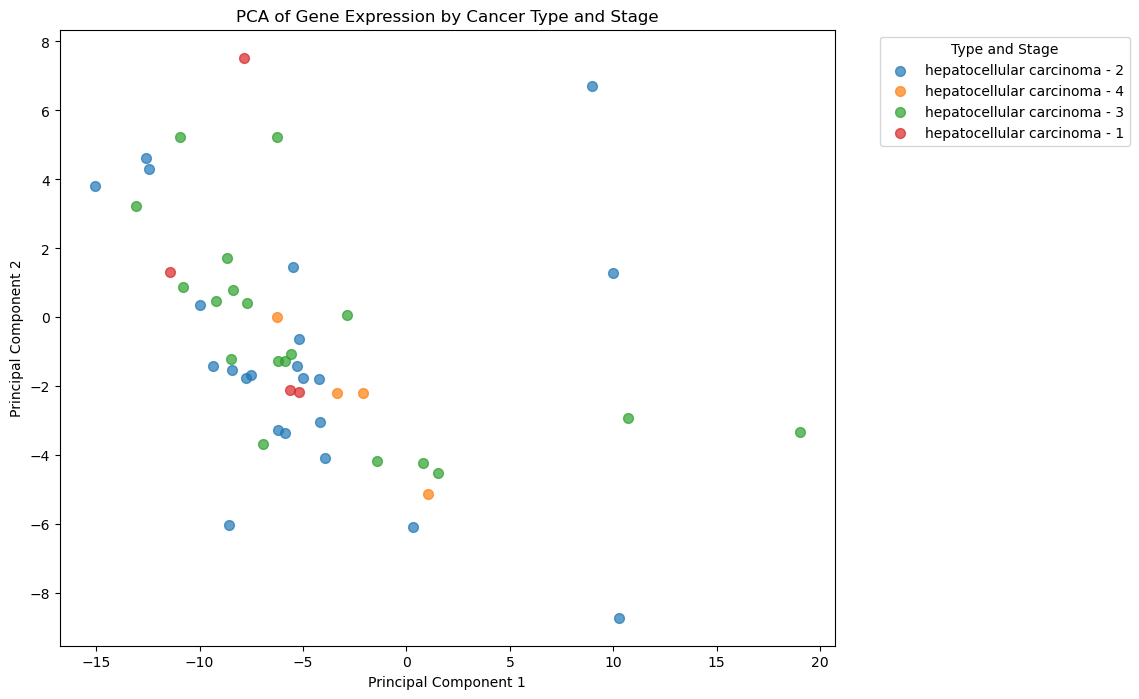

In [28]:
filtered_labels = [
    'hepatocellular carcinoma - 1',
    'hepatocellular carcinoma - 2',
    'hepatocellular carcinoma - 3',
    'hepatocellular carcinoma - 4'
]
pca_df_filtered = pca_df[pca_df['Type_Stage'].isin(filtered_labels)]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in zip(pca_df_filtered['Type_Stage'].unique(), plt.cm.tab10.colors):  # Using tab10 for distinct colors
    condition = pca_df_filtered['Type_Stage'] == label
    ax.scatter(pca_df_filtered.loc[condition, 'PC1'], pca_df_filtered.loc[condition, 'PC2'], label=label, s=50, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Gene Expression by Cancer Type and Stage')
ax.legend(title='Type and Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

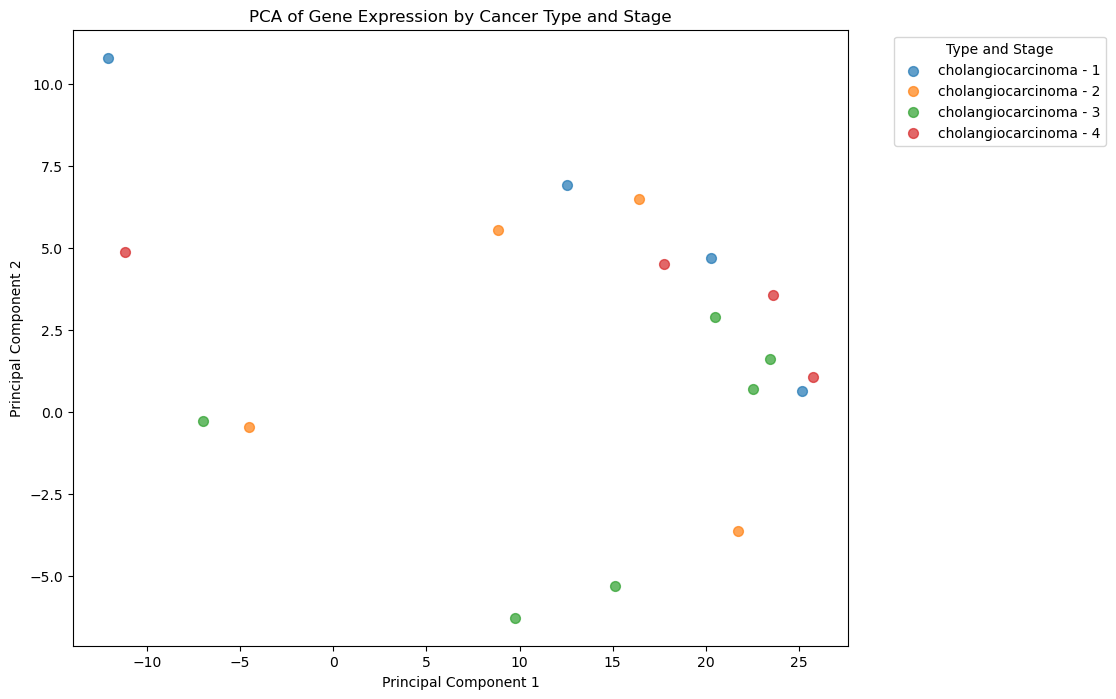

In [29]:
filtered_labels = [
    'cholangiocarcinoma - 1',
    'cholangiocarcinoma - 2',
    'cholangiocarcinoma - 3',
    'cholangiocarcinoma - 4'
]
pca_df_filtered = pca_df[pca_df['Type_Stage'].isin(filtered_labels)]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in zip(pca_df_filtered['Type_Stage'].unique(), plt.cm.tab10.colors):  # Using tab10 for distinct colors
    condition = pca_df_filtered['Type_Stage'] == label
    ax.scatter(pca_df_filtered.loc[condition, 'PC1'], pca_df_filtered.loc[condition, 'PC2'], label=label, s=50, alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Gene Expression by Cancer Type and Stage')
ax.legend(title='Type and Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df3 = pd.read_csv('merged_data.csv')

def map_stage_to_group(stage):
    if stage in ['hepatocellular carcinoma - 1', 'hepatocellular carcinoma - 2']:
        return 'Group 1'
    elif stage in ['hepatocellular carcinoma - 3']:
        return 'Group 2'

    
filtered_df3 = df3[df3['Type_Stage'].isin([
    'hepatocellular carcinoma - 1',
    'hepatocellular carcinoma - 2',
    'hepatocellular carcinoma - 3'
])]
    
filtered_df3['Group'] = filtered_df3['Type_Stage'].apply(map_stage_to_group)

# Filter the DataFrame to include only the relevant rows
df_filtered = filtered_df3[filtered_df3['Group'] != 'Other']

print(df_filtered['Group'].unique())
print(df_filtered.head())

['Group 1' 'Group 2']
  Unnamed: 0     CFH    PON1    FMO3  MLXIPL  CYP3A43    CPS1   ABCC2  \
0    SP50115  2.6753  3.5607  3.0867  3.1693   7.9382  3.1181  3.4213   
1    SP98896  2.7240  3.1734  3.1974  2.6348   2.6334  4.3796  3.0209   
3    SP98900  1.5423  3.1375  2.1911  1.6951   1.1678 -0.0124  2.8678   
4    SP98902  3.2073  3.5100  2.7133  2.9118   7.0723  3.3184  2.9322   
5    SP98913  2.0238  3.6966  3.8179  3.2725   1.2731  3.2307  2.5740   

   HSD17B6      C6  ...  RP13-270P17.3  OR52E1  GS1-293C5.1  RP11-290D2.6  \
0   3.5070  3.2349  ...        -3.5301 -2.0333       4.0068       -3.3423   
1   3.2826  3.4900  ...        -3.5301 -2.0333       3.5105       -3.3423   
3   2.6489  1.1106  ...        -3.5301 -2.0333      -0.4960       -3.3423   
4   3.3362  3.6423  ...        -3.5301 -2.0333       0.7564       -3.3423   
5   3.4927  3.5445  ...        -3.5301 -2.0333      -0.8514       -3.3423   

   RP5-1180E21.5      Cancer Type Detailed  Tumor Stage (AJCC)  \
0        -

/var/folders/93/kkjjknp12k582b4gm6fvlsxc0000gn/T/ipykernel_39645/1055506709.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3['Group'] = filtered_df3['Type_Stage'].apply(map_stage_to_group)


In [31]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df_filtered.drop(['Unnamed: 0', 'Cancer Type Detailed', 'Tumor Stage (AJCC)', 'Cancer Type', 'Type_Stage', 'Group'], axis=1)
y = df_filtered['Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.78
Confusion Matrix:
 [[4 0]
 [2 3]]
Classification Report:
               precision    recall  f1-score   support

     Group 1       0.67      1.00      0.80         4
     Group 2       1.00      0.60      0.75         5

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.77         9
weighted avg       0.85      0.78      0.77         9



In [33]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df_filtered.drop(['Unnamed: 0', 'Cancer Type Detailed', 'Tumor Stage (AJCC)', 'Cancer Type', 'Type_Stage', 'Group'], axis=1)
y = df_filtered['Group']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.56


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up the grid of parameters to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40 , 50],
    'min_samples_split': [2, 5, 10, 15 ,20],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  30.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   0.7s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500; total time=   0.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_featur

[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_dep

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=No

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=au

[CV] END max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_fe

[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_feat

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_feature

[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sq

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_featu

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto

[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=

[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sq

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_featu

[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=50, max_features=auto

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.1sBest parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
Best cross-validation score: 0.61


/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1588 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
 

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM classifier with default parameters
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf', 'poly'

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy with SVM: {accuracy_svm:.2f}')
print("Confusion Matrix with SVM:\n", conf_matrix_svm)
print("Classification Report with SVM:\n", class_report_svm)

Accuracy with SVM: 0.67
Confusion Matrix with SVM:
 [[3 1]
 [2 3]]
Classification Report with SVM:
               precision    recall  f1-score   support

     Group 1       0.60      0.75      0.67         4
     Group 2       0.75      0.60      0.67         5

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9



In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Types of regularization
    'solver': ['liblinear', 'saga']  # Solvers that support l1 penalty
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Enhanced Accuracy with Logistic Regression: {accuracy_best:.2f}')

/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shivank/anaconda3/lib/python3.11/site-packages/s

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.61
Enhanced Accuracy with Logistic Regression: 0.44


/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shivank/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
from sklearn.model_selection import cross_val_score

# Initialize the SVM classifier with the chosen kernel
svm_model_cv = SVC(kernel='linear', random_state=42)  # 'linear' kernel is used; change if needed

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model_cv, X, y, cv=5, scoring='accuracy')

# Print the results from the cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation in CV:", np.std(cv_scores))

Cross-Validation Scores: [0.33333333 0.44444444 0.77777778 0.33333333 0.66666667]
Mean CV Accuracy: 0.5111111111111111
Standard Deviation in CV: 0.18053418676968805
